<a href="https://colab.research.google.com/github/jeevanswaroopdasari/Cryptocurrency-Prediction-using-ARIMA-and-LSTM/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CS725_LSTM_Project/consolidated_coin_data.csv'
timeseries_data_df=pd.read_csv(file_path)
is_bitcoin = timeseries_data_df['Currency'] == 'bitcoin'
df = timeseries_data_df[is_bitcoin].iloc[::-1]

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1
df1 = df1.str.replace(',', '')
df1 = pd.to_numeric(df1)

In [ ]:
df1.head()

0    134.21
1    144.54
2    139.00
3    116.99
4    105.21
Name: Close, dtype: float64

In [ ]:
df1.tail()

2407    7569.63
2408    7424.29
2409    7321.99
2410    7320.15
2411    7252.03
Name: Close, dtype: float64

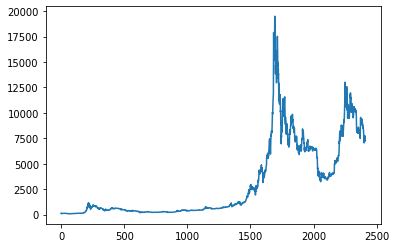

In [ ]:
df1.plot.line()

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df1)

In [ ]:
test_result

(-1.6180522363456298,
 0.4737505825227844,
 27,
 2384,
 {'1%': -3.433095954313574,
  '10%': -2.567415796254955,
  '5%': -2.8627531220854534},
 32956.08336003646)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df1)

ADF Test Statistic : -1.6180522363456298
p-value : 0.4737505825227844
#Lags Used : 27
Number of Observations Used : 2384
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


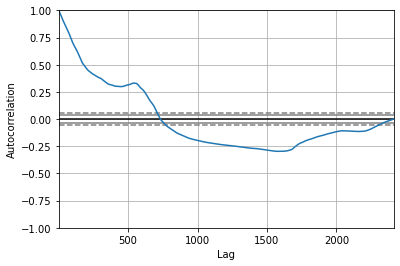

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

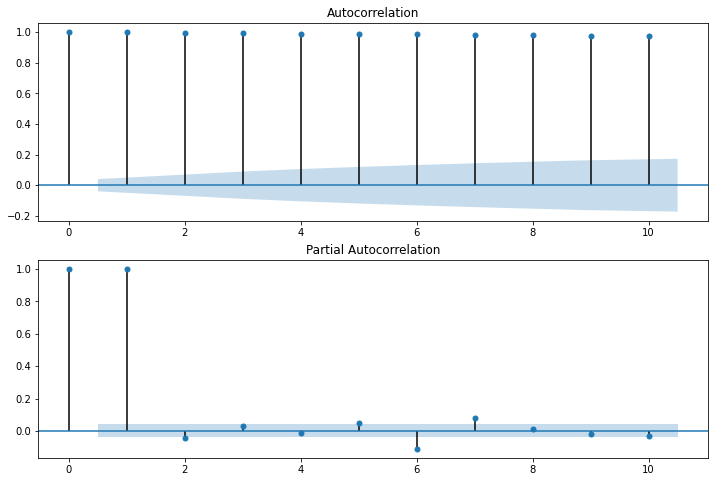

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1.iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1.iloc[13:],lags=10,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

###ARIMA(p, d, q): p AR model lags d differencing q MA lags

* Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

* For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.



In [ ]:
model=ARIMA(df1,order=(2,0,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2412
Model:                     ARMA(2, 1)   Log Likelihood              -16726.386
Method:                       css-mle   S.D. of innovations            248.287
Date:                Mon, 07 Dec 2020   AIC                          33462.773
Time:                        10:01:52   BIC                          33491.714
Sample:                             0   HQIC                         33473.299
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3023.4985   1916.144      1.578      0.115    -732.074    6779.071
ar.L1.Close     0.2813      0.072      3.913      0.000       0.140       0.422
ar.L2.Close     0.7147      0.072      9.959      0.000       0.574       0.855
ma.L1.Close     0.7740      0.065     11.997      0.000       0.648       0.900
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0024           +0.0000j            1.0024            0.0000
AR.2           -1.3960           +0.0000j            1.3960            0.5000
MA.1           -1.2920           +0.0000j            1.2920            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
df1_predict = model_fit.predict(start=10,end=2411,dynamic=True)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
def MAPE(y_true,y_pred):
  mape=np.mean(np.abs(y_true-y_pred)/y_true)*100
  return mape

print('RMSE=','%0.3f'%math.sqrt(mean_squared_error(df1[10:2412],df1_predict)))

print('----------------------')
print('MAE=','%0.3f'%mean_absolute_error(df1[10:2412],df1_predict))

print('----------------------')
print('MAPE=','%0.3f'%MAPE(df1[10:2412],df1_predict),'%')

print('----------------------')

RMSE= 3527.673
----------------------
MAE= 2658.951
----------------------
MAPE= 306.150 %
----------------------


In [ ]:
df1_act=df1[10:]
inputforLSTM = df1_act - df1_predict
input = pd.DataFrame(inputforLSTM, columns=['close']).to_csv('data.csv')

In [ ]:
Arima_pred=pd.DataFrame(df1_predict, columns=['close']).to_csv('arima_pred.csv')